In [1]:
import sys
sys.path.append('..')

from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

import mdgrad
import mdgrad.nn as nn
import mdgrad.optim as optim

In [2]:
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

X_train, y_train = mdgrad.tensor(diabetes_X_train), mdgrad.tensor(diabetes_y_train)
X_test, y_test = mdgrad.tensor(diabetes_X_test), mdgrad.tensor(diabetes_y_test)


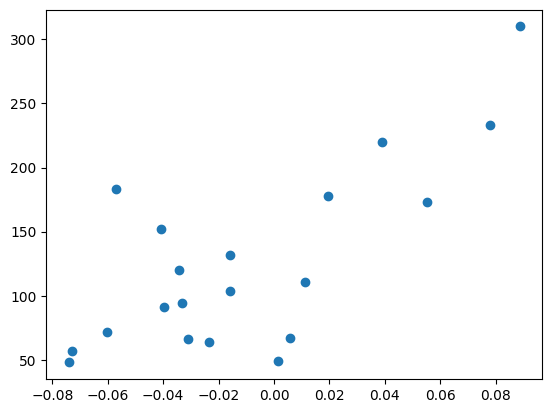

In [3]:
plt.scatter(X_test.numpy(), y_test.numpy())

In [4]:
X_train_max, y_train_max, X_test_max, y_test_max = X_train.max(), y_train.max(), X_test.max(), y_test.max()
X_train = X_train / X_train_max
y_train = y_train.reshape(422, 1) / y_train_max
X_test = X_test / X_test_max
y_test = y_test.reshape(20, 1) / y_test_max

In [5]:
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 50)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(50, 150)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(150, 70)
        self.act3 = nn.ReLU()
        self.l4 = nn.Linear(70, 30)
        self.act4 = nn.ReLU()
        self.l5 = nn.Linear(30, 10)
        self.act5 = nn.ReLU()
        self.l6 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.act1(self.l1(x))
        x = self.act2(self.l2(x))
        x = self.act3(self.l3(x))
        x = self.act4(self.l4(x))
        x = self.act5(self.l5(x))
        x = self.l6(x)
        return x

In [6]:
num_epochs = 500
lr = 0.05

model = RegressionModel()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, nesterov=True)

In [7]:
losses = []

for i in range(num_epochs):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    if (i+1) % 10 == 0 or i == 0:
        print(f'Epoch: {i+1}\tLoss: {loss.data:.4f}')

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track performance
    losses.append(loss.data)
    


Epoch: 1	Loss: 0.2496
Epoch: 10	Loss: 0.0527
Epoch: 20	Loss: 0.0344
Epoch: 30	Loss: 0.0333
Epoch: 40	Loss: 0.0330
Epoch: 50	Loss: 0.0328
Epoch: 60	Loss: 0.0328
Epoch: 70	Loss: 0.0327
Epoch: 80	Loss: 0.0327
Epoch: 90	Loss: 0.0327
Epoch: 100	Loss: 0.0327
Epoch: 110	Loss: 0.0327
Epoch: 120	Loss: 0.0327
Epoch: 130	Loss: 0.0327
Epoch: 140	Loss: 0.0327
Epoch: 150	Loss: 0.0327
Epoch: 160	Loss: 0.0327
Epoch: 170	Loss: 0.0327
Epoch: 180	Loss: 0.0327
Epoch: 190	Loss: 0.0327
Epoch: 200	Loss: 0.0327
Epoch: 210	Loss: 0.0327
Epoch: 220	Loss: 0.0327
Epoch: 230	Loss: 0.0327
Epoch: 240	Loss: 0.0326
Epoch: 250	Loss: 0.0326
Epoch: 260	Loss: 0.0326
Epoch: 270	Loss: 0.0326
Epoch: 280	Loss: 0.0326
Epoch: 290	Loss: 0.0326
Epoch: 300	Loss: 0.0326
Epoch: 310	Loss: 0.0326
Epoch: 320	Loss: 0.0326
Epoch: 330	Loss: 0.0326
Epoch: 340	Loss: 0.0326
Epoch: 350	Loss: 0.0326
Epoch: 360	Loss: 0.0326
Epoch: 370	Loss: 0.0326
Epoch: 380	Loss: 0.0326
Epoch: 390	Loss: 0.0326
Epoch: 400	Loss: 0.0326
Epoch: 410	Loss: 0.0326
Epo

In [8]:
x_vals = mdgrad.tensor(np.linspace(-0.9, 1.0, 1000)).reshape(1000, 1)
y_vals = model(x_vals)

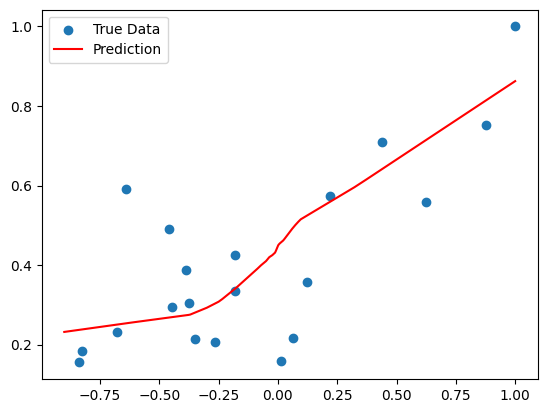

In [9]:
plt.scatter(X_test.numpy(), y_test.numpy(), label='True Data')
plt.plot(x_vals, y_vals, 'r', label='Prediction')
plt.legend()